## Importando bibliotecas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importando Base de Dados

In [4]:
feData = pd.read_csv('data/ifood-restaurants-february-2021.csv')
noData = pd.read_csv('data/ifood-restaurants-november-2020.csv')


In [5]:
feData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

Restaurantes que sobreviveram de novembro de 2020 até feveiro de 2021 (não incluiu restaurantes que fecharam antes de novembro de 2020)

In [6]:
data = feData[feData['url'].isin(noData['url'])]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 317191 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  317191 non-null  bool   
 1   avatar                  316929 non-null  object 
 2   category                317191 non-null  object 
 3   delivery_fee            317191 non-null  float64
 4   delivery_time           317191 non-null  int64  
 5   distance                317191 non-null  float64
 6   ibge                    317191 non-null  int64  
 7   minimumOrderValue       317191 non-null  float64
 8   name                    317191 non-null  object 
 9   paymentCodes            317191 non-null  object 
 10  price_range             317191 non-null  object 
 11  rating                  317191 non-null  float64
 12  tags                    317191 non-null  object 
 13  url                     317191 non-null  object 
dtypes: bool(1), float64(

<AxesSubplot:ylabel='Frequency'>

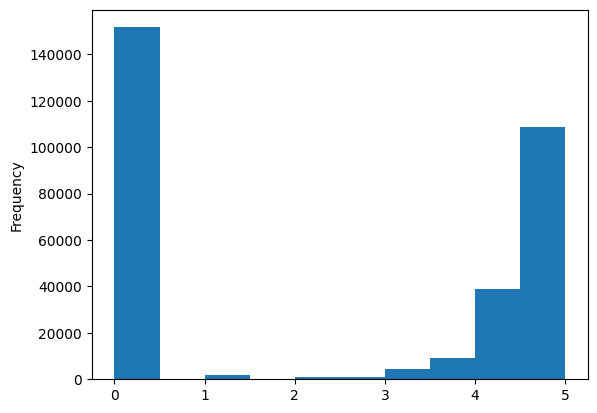

In [7]:
#plot 'rating' distribuition 
data['rating'].plot.hist(bins=10)


In [18]:
#removendo restaurantes com rating == 0 
data = data[data['rating'] != 0]

<AxesSubplot:ylabel='Frequency'>

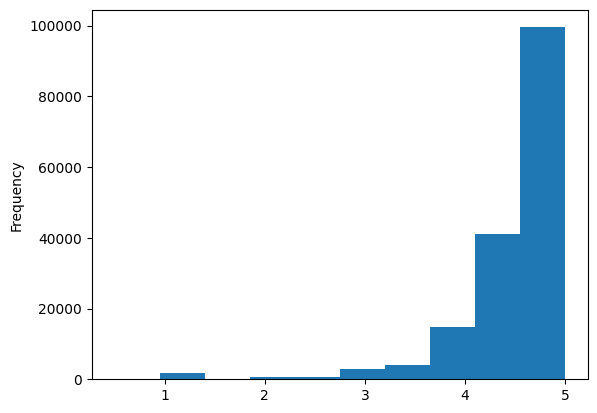

In [20]:
data['rating'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

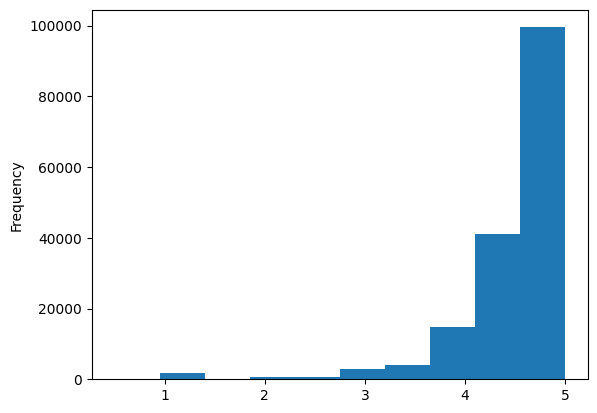

In [8]:
data = data[data['rating'] != 0]
data['rating'].plot.hist(bins=10)

<AxesSubplot:>

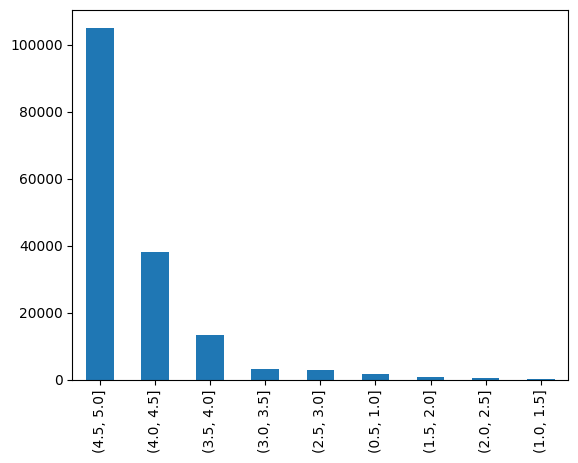

In [9]:


data['rating_bin'] = pd.cut(data['rating'], np.arange(0.5, 5.5, 0.5))
data['rating_bin'].value_counts().plot.bar()


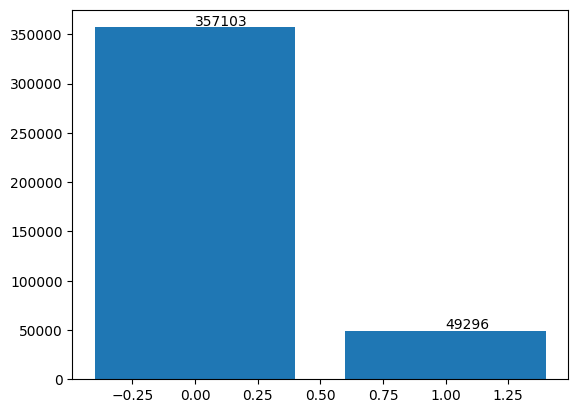

In [20]:
feData['rating_max'] = feData['rating'].apply(lambda x: 1 if x == 5 else 0)

# Count the occurrences of each class
class_counts = feData['rating_max'].value_counts()

# Create the bar plot
plt.bar(class_counts.index, class_counts.values)

# Annotate each bar with the count of the class
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 2000, str(v))


plt.show()

O que um restaurante nota 5 precisa ter? 

In [25]:
rate_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49296 entries, 2453 to 406397
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   availableForScheduling  49296 non-null  bool   
 1   avatar                  49291 non-null  object 
 2   category                49296 non-null  object 
 3   delivery_fee            49296 non-null  float64
 4   delivery_time           49296 non-null  int64  
 5   distance                49296 non-null  float64
 6   ibge                    49296 non-null  int64  
 7   minimumOrderValue       49296 non-null  float64
 8   name                    49296 non-null  object 
 9   paymentCodes            49296 non-null  object 
 10  price_range             49296 non-null  object 
 11  rating                  49296 non-null  float64
 12  tags                    49296 non-null  object 
 13  url                     49296 non-null  object 
 14  rating_max              49296 non-

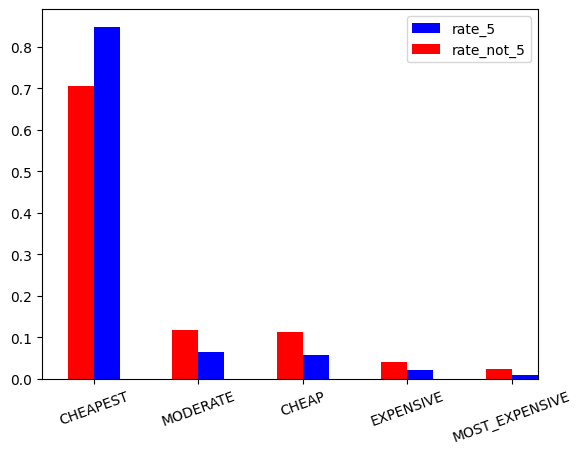

In [45]:


#plotando a distribuição de preços dos restaurantes com rating == 5 e != 5 com dados normalizados para preservar a proporção 
fig, ax = plt.subplots()
(rate_5['price_range'].value_counts()/rate_5['price_range'].count()).plot.bar(ax=ax, color='blue', position=0, width=0.25, label='rate_5')
(rate_not_5['price_range'].value_counts()/rate_not_5['price_range'].count()).plot.bar(ax=ax, color='red', position=1, width=0.25, label='rate_not_5')
plt.xticks(rotation=20)
plt.legend()
plt.show()


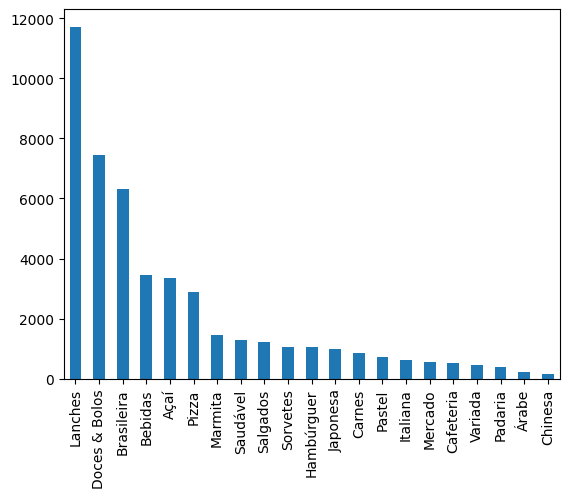

In [49]:
rate_5['category'].value_counts()[data['category'].value_counts() > 1000].plot.bar()


plt.show()


## Analisando as logos



In [3]:
data = pd.concat([feData, noData], ignore_index=True)




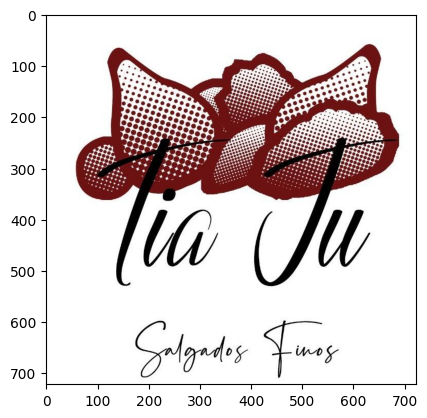

In [6]:
sample = data.sample(1)['avatar']
#get image from url and plot it 
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt
pixels = 0
image = 0
url = sample.values[0]
with urllib.request.urlopen(url) as url:
    image = Image.open(url)
    plt.imshow(image)
    
    pixels = image.getdata()







### Color Quantization usando K-means


In [16]:
from sklearn.cluster import KMeans
import numpy as np


# Convert the pixels to a numpy array
pixels_array = np.array(pixels)

# Use the KMeans algorithm to cluster the pixels into 10 clusters
kmeans = KMeans(n_clusters=10).fit(pixels_array)


# Create a dictionary to store the frequencies of the cluster labels
cluster_freq = {}

# Iterate over the cluster labels and count the frequencies
for label in kmeans.labels_:
    if label not in cluster_freq:
        cluster_freq[label] = 1
    else:
        cluster_freq[label] += 1

# Sort the dictionary by values in descending order
sorted_clusters = sorted(cluster_freq.items(), key=lambda x: x[1], reverse=True)

background = sorted_clusters[0]
# Get the top three cluster labels but igore the first one, wich represents the background
top_three = sorted_clusters[1:4]

# Print the top three cluster labels
for label, freq in top_three:
    print(label, freq)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

#background color 
background_color = cluster_centers[background[0]].astype(int)


# Get the dominant color for each cluster
for label, freq in top_three:
    dominant_color = cluster_centers[label].astype(int)
    print(dominant_color, freq)

7 50824
5 26059
2 25451
[105  19  19] 50824
[249 239 238] 26059
[5 3 3] 25451


In [17]:
colors = {
    'red': (255, 0, 0),
    'orange': (255, 165, 0),
    'yellow': (255, 255, 0),
    'green': (0, 128, 0),
    'blue': (0, 0, 255),
    'indigo': (75, 0, 130),
    'violet': (238, 130, 238),
    'pink': (255, 192, 203),
    'brown': (165, 42, 42),
    'gray': (128, 128, 128),
    'white': (255, 255, 255),
    'black': (0, 0, 0),
    'purple': (128, 0, 128),
    'teal': (0, 128, 128),
    'navy': (0, 0, 128),
    'maroon': (128, 0, 0),
    'olive': (128, 128, 0),
    'lime': (0, 255, 0),
    'turquoise': (64, 224, 208),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'tan': (210, 180, 140),
    'gold': (255, 215, 0),
    'silver': (192, 192, 192),
}

def closest_color(rgb):
    min_distance = float('inf')
    closest_color = None
    for color, value in colors.items():
        distance = sum([(a - b) ** 2 for a, b in zip(rgb, value)])
        if distance < min_distance:
            min_distance = distance
            closest_color = color
    return closest_color

IndexError: tuple index out of range

IndexError: index 3 is out of bounds for axis 0 with size 3

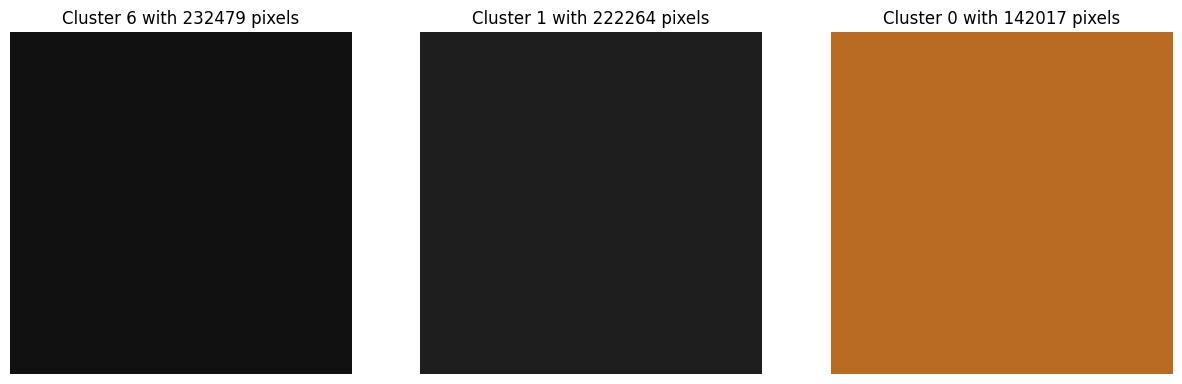

In [41]:


#dominant colors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (label, freq) in enumerate(top_three):
    dominant_color = cluster_centers[label].astype(int)
    ax[i].imshow([[dominant_color]])
    ax[i].set_title(f'Cluster {label} with {freq} pixels')
    ax[i].axis('off')  
plt.show()


In [37]:
from colorthief import ColorThief

color_thief = ColorThief("temp.jpg")
# get the dominant color
palette = color_thief.get_palette(color_count=6)
# build a color palette
print(palette)




[(47, 57, 61), (207, 208, 190), (130, 169, 49), (124, 130, 135), (101, 133, 79), (148, 156, 172)]


In [10]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

totalAvList = []

for i in range(0, len(noData['url'])):
    url = noData['url'][i]

    nav = webdriver.Chrome(ChromeDriverManager().install())
    nav.get(url)

    ##se o site ao estiver inativo
    if not nav.title == 'Delivery de Comida e Mercado - iFood':
        nav.find_element(By.CLASS_NAME,'restaurant-rating__rating-wrapper').click()
        # content.click()

        content = nav.find_element(By.CLASS_NAME, 'rating-counter__total')

        totalAv = content.text
        totalAv = totalAv.split()
        totalAvList.append(totalAv[0])
        # print(totalAv[0])
    else:
        totalAvList.append(0)

    nav.quit()


# url = noData['url'][0]

# nav = webdriver.Chrome(ChromeDriverManager().install())
# nav.get(url)

# ##se o site ao estiver inativo
# if not nav.title == 'Delivery de Comida e Mercado - iFood':
#     nav.find_element(By.CLASS_NAME,'restaurant-rating__rating-wrapper').click()
#     # content.click()

#     content = nav.find_element(By.CLASS_NAME, 'rating-counter__total')

#     totalAv = content.text
#     totalAv = totalAv.split()
#     totalAvList.append(totalAv[0])
#     print(totalAv[0])


# nav.quit()

# print(content.text)

ModuleNotFoundError: No module named 'webdriver_manager'

In [9]:
totalAvList

['40', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]